In [ ]:
import numpy as np
import random
import os
import time
from tslearn.svm import TimeSeriesSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tslearn.shapelets import LearningShapelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 3.6 MB/s eta 0:00:00


In [3]:
# Load prepared data
DATA_PATH = "/content/drive/MyDrive/datas kopyası/ready_data"
X_train = np.load(os.path.join(DATA_PATH, "X_train.npy"))
X_test = np.load(os.path.join(DATA_PATH, "X_test.npy"))
y_train = np.load(os.path.join(DATA_PATH, "y_train.npy"))
y_test = np.load(os.path.join(DATA_PATH, "y_test.npy"))
classes = np.load(os.path.join(DATA_PATH, "label_classes.npy"))
print("Data loaded successfully.")

Data loaded successfully.


MODEL 1: GAK + SVM
Training Shape: (479, 50, 75)
Test shape:   (120, 50, 75)

 Model Training is starting...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

[LibSVM]*.*
optimization finished, #iter = 238
obj = -79.493744, rho = -0.012500
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -80.000000, rho = -0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
nSV = 160, nBSV = 160
*.*
optimization finished, #iter = 238
obj = -79.493744, rho = 0.012500
nSV = 159, nBSV = 79
*.*
optimization finished, #iter = 238
obj = -79.493744, rho = 0.012500
nSV = 159, nBSV = 79
*.*
optimization finished, #iter = 238
obj = -79.493744, rho = 0.012500
nSV = 159, nBSV = 79
*.*
optimization finished, #iter = 238
obj = -79.493744, rho = 0.012500
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
n

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 11234 tasks  


 ACCURACY: 33.33%

Classification Report:
              precision    recall  f1-score   support

      boxing       1.00      1.00      1.00        20
handclapping       0.00      0.00      0.00        20
  handwaving       0.00      0.00      0.00        20
     jogging       0.00      0.00      0.00        20
     running       0.00      0.00      0.00        20
     walking       0.20      1.00      0.33        20

    accuracy                           0.33       120
   macro avg       0.20      0.33      0.22       120
weighted avg       0.20      0.33      0.22       120



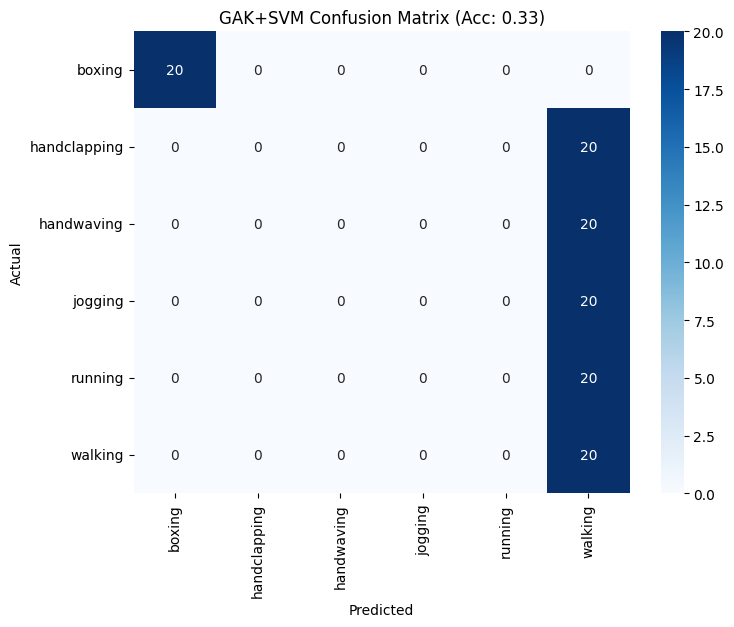

In [ ]:
# GAK + SVM Model
def run_gak_svm(kernel, gamma, C):
    print("="*60)
    print("MODEL 1: GAK + SVM")
    print("="*60)

    # Train and Test shapes
    print(f"Training Shape: {X_train.shape}")
    print(f"Test shape:   {X_test.shape}")

    print("\n Model Training is starting...")

    start_time = time.time()

    # Create SVM classifier with GAK kernel
    svm_clf = TimeSeriesSVC(kernel=kernel, gamma=gamma, C=C, verbose=True, n_jobs=-1)

    # Fit the model
    svm_clf.fit(X_train, y_train)

    train_time = time.time() - start_time
    print(f"Train successful: {train_time/60:.1f} minutes")

    # Test the model
    y_pred = svm_clf.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n ACCURACY: {acc*100:.2f}%")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=classes, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"GAK+SVM Confusion Matrix (Acc: {acc:.2f})")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

if __name__ == "__main__":
    run_gak_svm(kernel="gak", gamma=0.1, C=1.0) # Initial paramters for testing

In [ ]:
# Random Search for Gak + Svm
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'gamma': [0.1, 0.5, 1.0, 3.0],
    'C': [0.1, 1.0, 5.0, 10.0]
}

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=TimeSeriesSVC(kernel="gak", n_jobs=1, verbose=1),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Do

[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, n

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   30.4s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   30.6s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   30.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s


[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=

[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.0s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[LibSVM].*
optimization finished, #iter = 138
obj = -63.492187, rho = -0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 120
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 126
.*
optimization finished, #iter = 139
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 139
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 139
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 139
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 118
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 

[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.5s


[LibSVM].*
optimization finished, #iter = 137
obj = -63.492187, rho = -0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 116
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 126
.*
optimization finished, #iter = 138
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 138
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 138
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 138
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 118
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.3s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.7s


[LibSVM]*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s


[LibSVM].*
optimization finished, #iter = 134
obj = -63.492187, rho = -0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 114
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 126
.*
optimization finished, #iter = 135
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 135
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 135
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 135
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 116
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 

[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.0s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496037, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496035, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496037, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496037, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496037, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1

[LibSVM].*
optimization finished, #iter = 196
obj = -63.496036, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496036, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496036, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496036, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496036, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   35.4s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   35.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   37.6s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.9s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   37.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496052, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496052, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496052, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496052, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496052, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   37.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[LibSVM]*
optimization finished, #iter = 64
obj = -63.999988, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999987, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999988, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999988, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999988, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*
optimizat

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   37.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   37.3s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   37.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=

[LibSVM]*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimizat

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   35.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   34.5s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   34.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[LibSVM].*.*
optimization finished, #iter = 283
obj = -63.300925, rho = -0.010923
nSV = 127, nBSV = 0
*
optimization finished, #iter = 107
obj = -63.969602, rho = -0.000475
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999997, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999997, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999997, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 273
obj = -63.291504, rho = 0.010451
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 283
obj = -63.300928, rho = 0.010923
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 283
obj = -63.300928, rho = 0.010923
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 283
obj = -63.300928, rho = 0.010923
nSV = 127, nBSV = 0
*
optimization finished, #iter = 106
obj = -63.969605, rho = 0.000475
nSV = 128, nBSV = 0
*
optimization finished, #iter = 106
obj = -63.969605, rho = 0.000475
nSV = 12

[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   34.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


[LibSVM].*.*
optimization finished, #iter = 280
obj = -63.287241, rho = -0.011137
nSV = 127, nBSV = 0
*
optimization finished, #iter = 87
obj = -63.980106, rho = -0.000311
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 278
obj = -63.300356, rho = 0.010831
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 280
obj = -63.287243, rho = 0.011137
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 280
obj = -63.287243, rho = 0.011137
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 280
obj = -63.287243, rho = 0.011137
nSV = 127, nBSV = 0
*
optimization finished, #iter = 86
obj = -63.980107, rho = 0.000311
nSV = 128, nBSV = 0
*
optimization finished, #iter = 86
obj = -63.980107, rho = 0.000311
nSV = 128, 

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.2s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.5s


[LibSVM].*.*
optimization finished, #iter = 266
obj = -63.404970, rho = -0.009297
nSV = 127, nBSV = 0
*
optimization finished, #iter = 81
obj = -63.979593, rho = -0.000319
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.406941, rho = 0.008982
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
*
optimization finished, #iter = 80
obj = -63.979594, rho = 0.000319
nSV = 128, nBSV = 0
*
optimization finished, #iter = 80
obj = -63.979594, rho = 0.000319
nSV = 128, 

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*


[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s


[LibSVM]*.*
optimization finished, #iter = 182
obj = -63.855071, rho = -0.002264
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966914, rho = -0.000517
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 166
obj = -63.847292, rho = 0.001748
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966919, rho = 0.000517
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966919, rho = 0.000517
nSV = 128, nB

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.5s
[Parallel(n_jobs=

[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*


[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   34.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*


[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   35.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   34.8s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s


[LibSVM]*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimizatio

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.9s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    3.6s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[LibSVM]*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimizat

[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_j

[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   34.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s


[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   35.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.7s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s


[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.4s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[LibSVM][LibSVM]*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
.**.
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 283
obj = -63.300925, rho = -0.010923
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 107
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
obj = -63.969602, rho = -0.000475
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999997, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999997, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999997, rho = 0.000000
nSV 

[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[LibSVM].*.*
optimization finished, #iter = 280
obj = -63.287241, rho = -0.011137
nSV = 127, nBSV = 0
*
optimization finished, #iter = 87
obj = -63.980106, rho = -0.000311
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 278
obj = -63.300356, rho = 0.010831
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 280
obj = -63.287243, rho = 0.011137
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 280
obj = -63.287243, rho = 0.011137
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 280
obj = -63.287243, rho = 0.011137
nSV = 127, nBSV = 0
*
optimization finished, #iter = 86
obj = -63.980107, rho = 0.000311
nSV = 128, nBSV = 0
*
optimization finished, #iter = 86
obj = -63.980107, rho = 0.000311
nSV = 128, 

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   36.9s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n

[LibSVM].*.*
optimization finished, #iter = 266
obj = -63.404970, rho = -0.009297
nSV = 127, nBSV = 0
*
optimization finished, #iter = 81
obj = -63.979593, rho = -0.000319
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.406941, rho = 0.008982
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
*
optimization finished, #iter = 80
obj = -63.979594, rho = 0.000319
nSV = 128, nBSV = 0
*
optimization finished, #iter = 80
obj = -63.979594, rho = 0.000319
nSV = 128, 

[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.7s
[Parallel(n_

[LibSVM].*.*
optimization finished, #iter = 264
obj = -63.405907, rho = -0.009283
nSV = 127, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.967660, rho = -0.000505
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999996, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999996, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999996, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.393301, rho = 0.008781
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 264
obj = -63.405911, rho = 0.009283
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 264
obj = -63.405911, rho = 0.009283
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 264
obj = -63.405911, rho = 0.009283
nSV = 127, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.967665, rho = 0.000505
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.967665, rho = 0.000505
nSV = 12

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s


[LibSVM]*.*
optimization finished, #iter = 182
obj = -63.855071, rho = -0.002264
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966914, rho = -0.000517
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 166
obj = -63.847292, rho = 0.001748
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966919, rho = 0.000517
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966919, rho = 0.000517
nSV = 128, nB

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    1.3s
[Parallel(n_

[LibSVM]*
optimization finished, #iter = 158
obj = -15.014932, rho = -0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -15.200000, rho = -0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, 

MODEL 1: GAK + SVM
Training Shape: (479, 50, 75)
Test shape:   (120, 50, 75)

 Model Training is starting...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

[LibSVM]*
optimization finished, #iter = 158
obj = -15.014932, rho = -0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -15.200000, rho = -0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 11234 tasks  


 ACCURACY: 56.67%

Classification Report:
              precision    recall  f1-score   support

      boxing       0.33      1.00      0.50        20
handclapping       0.00      0.00      0.00        20
  handwaving       0.00      0.00      0.00        20
     jogging       0.68      0.85      0.76        20
     running       0.93      0.70      0.80        20
     walking       0.85      0.85      0.85        20

    accuracy                           0.57       120
   macro avg       0.47      0.57      0.48       120
weighted avg       0.47      0.57      0.48       120



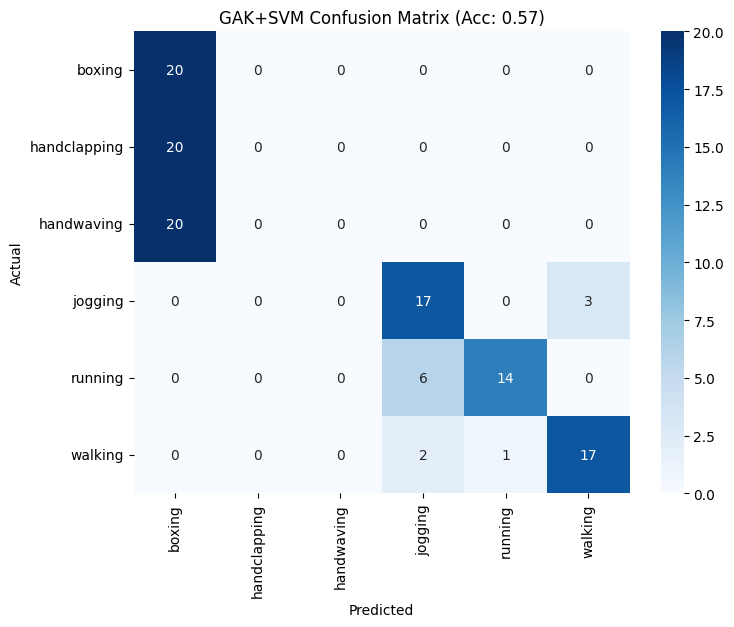

In [ ]:
# Run final model with best hyperparameters
if __name__ == "__main__":
    run_gak_svm(kernel="gak", gamma=0.5, C=0.1)

Running on: cpu
MODEL 2: SHAPELETS + MLP

 Shapelet Transformation is starting...


/usr/local/lib/python3.12/dist-packages/tslearn/shapelets/shapelets.py:492: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'min_pooling_0' (of type GlobalMinPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - categorical_accuracy: 0.1673 - categorical_crossentropy: 12.1291 - loss: 12.1291
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - categorical_accuracy: 0.1523 - categorical_crossentropy: 11.0231 - loss: 11.0231
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - categorical_accuracy: 0.1606 - categorical_crossentropy: 10.6927 - loss: 10.6927
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - categorical_accuracy: 0.1632 - categorical_crossentropy: 9.9571 - loss: 9.9571
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - categorical_accuracy: 0.1630 - categorical_crossentropy: 8.6533 - loss: 8.6533
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - categorical_accuracy: 0.3075 - categorical_crossentropy: 7.3561 - loss: 7.3561
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - categorical_accuracy: 0.3158 - categorical_crossentropy: 6.3148 - loss: 6.3148
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - categorical_accuracy: 0.2

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'min_pooling_0' (of type GlobalMinPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'min_pooling_0' (of type GlobalMinPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Transformation Successful!
New X_train shape: (479, 10)

 MLP Training (50 Epoch)...
   Epoch [10/50] - Loss: 1.4244 - Acc: 37.16%
   Epoch [20/50] - Loss: 1.2455 - Acc: 44.47%
   Epoch [30/50] - Loss: 1.1692 - Acc: 44.47%
   Epoch [40/50] - Loss: 1.0820 - Acc: 49.69%
   Epoch [50/50] - Loss: 1.0183 - Acc: 51.57%

TEST ACCURACY: 55.00%

Classification Report:
              precision    recall  f1-score   support

      boxing       0.58      0.75      0.65        20
handclapping       0.59      0.80      0.68        20
  handwaving       0.67      0.50      0.57        20
     jogging       0.40      0.10      0.16        20
     running       0.49      0.90      0.63        20
     walking       0.50      0.25      0.33        20

    accuracy                           0.55       120
   macro avg       0.54      0.55      0.50       120
weighted avg       0.54      0.55      0.50       120



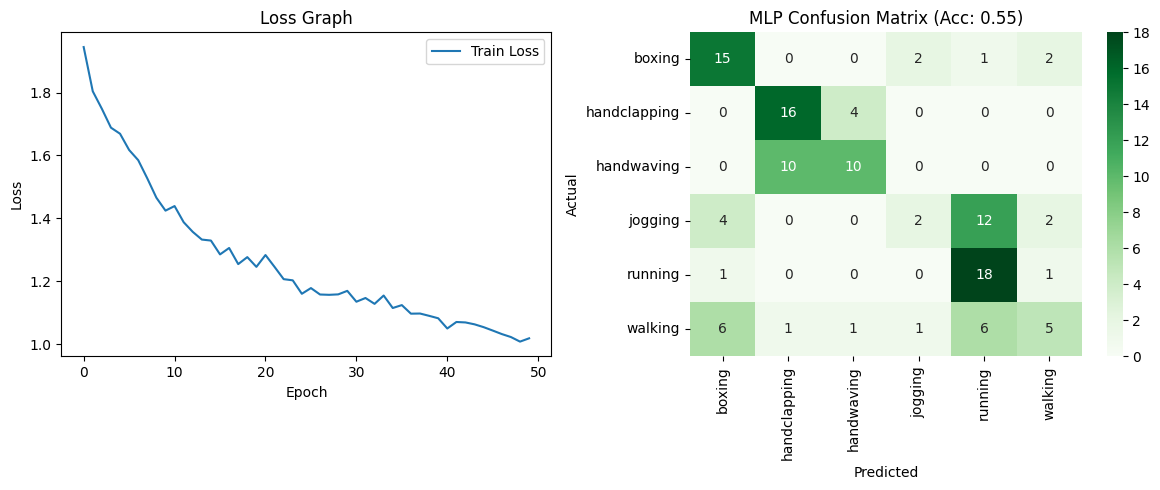

In [4]:
# Shapelets + MLP Model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initial Hyperparameters
BATCH_SIZE = 16
EPOCHS = 50
LEARNING_RATE = 0.001

print(f"Running on: {DEVICE}")

def run_shapelets_mlp():
    print("="*60)
    print("MODEL 2: SHAPELETS + MLP")
    print("="*60)

    # Preparing Data
    print("\n Shapelet Transformation is starting...")

    # Training with test parameters
    shapelet_model = LearningShapelets(n_shapelets_per_size={20: 10},
                                       max_iter=50,
                                       verbose=1,
                                       scale=False,
                                       random_state=42)

    # Fit the model
    shapelet_model.fit(X_train, y_train)

    # Transform to shapelet space
    X_train_trans = shapelet_model.transform(X_train)
    X_test_trans = shapelet_model.transform(X_test)

    print(f"Transformation Successful!")
    print(f"New X_train shape: {X_train_trans.shape}")

    # Prepare DataLoader for PyTorch
    train_data = TensorDataset(torch.tensor(X_train_trans, dtype=torch.float32),
                               torch.tensor(y_train, dtype=torch.long))
    test_data = TensorDataset(torch.tensor(X_test_trans, dtype=torch.float32),
                              torch.tensor(y_test, dtype=torch.long))

    train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

    # MLP Model Definition with PyTorch
    class SimpleMLP(nn.Module):
        def __init__(self, input_dim, num_classes):
            super(SimpleMLP, self).__init__()
            self.net = nn.Sequential(
                nn.Linear(input_dim, 64),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, num_classes)
            )

        def forward(self, x):
            return self.net(x)


    input_dim = X_train_trans.shape[1]
    num_classes = len(classes)

    # Initialize Model, Loss Function and Optimizer
    model = SimpleMLP(input_dim, num_classes).to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # Model Training
    print(f"\n MLP Training ({EPOCHS} Epoch)...")
    train_losses = []

    model.train()
    for epoch in range(EPOCHS):
        epoch_loss = 0
        correct = 0
        total = 0

        # Batch Training
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            # zero grad for each batch
            optimizer.zero_grad()
            outputs = model(inputs)

            # loss calculation
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() # Accumulate loss
            _, predicted = torch.max(outputs.data, 1) # Get predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item() # Count of correct predictions

        # Epoch statistics
        avg_loss = epoch_loss / len(train_loader)
        acc = 100 * correct / total
        train_losses.append(avg_loss)

        if (epoch+1) % 10 == 0:
            print(f"   Epoch [{epoch+1}/{EPOCHS}] - Loss: {avg_loss:.4f} - Acc: {acc:.2f}%")


    # Model Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_acc = accuracy_score(all_labels, all_preds)
    print(f"\nTEST ACCURACY: {test_acc*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes))

    # Visualization
    plt.figure(figsize=(12, 5))

    # Loss Graph
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.title("Loss Graph")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Confusion Matrix
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
    plt.title(f"MLP Confusion Matrix (Acc: {test_acc:.2f})")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_shapelets_mlp()


In [14]:
# Hyperparameter Tuning for Shapelets + MLP can be added similarly using libraries like Optuna or manual grid search.
from sklearn.model_selection import train_test_split
import warnings
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)
warnings.filterwarnings("ignore", message=".*does not support masking.*")
warnings.filterwarnings("ignore", message="The default value for 'scale' is set to False ")
class SimpleMLP(nn.Module):
        def __init__(self, input_dim, num_classes):
            super(SimpleMLP, self).__init__()
            self.net = nn.Sequential(
                nn.Linear(input_dim, 64),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, num_classes)
            )

        def forward(self, x):
            return self.net(x)

param_space = {
    "shapelet_size": [15, 20, 30],
    "n_shapelets": [5, 10],
    "batch_size": [16, 32],
    "learning_rate": [1e-3, 5e-4],
    "epochs": [30, 50]
}

def train_eval_one_config(shapelet_size, n_shapelets, batch_size, lr, epochs):
    # Shapelets
    shapelet_model = LearningShapelets(
        n_shapelets_per_size={shapelet_size: n_shapelets},
        max_iter=50,
        scale=False,
        random_state=42,
        verbose=0
    )

    shapelet_model.fit(X_tr, y_tr)

    X_tr_s = shapelet_model.transform(X_tr)
    X_val_s = shapelet_model.transform(X_val)

    # DataLoader
    train_ds = TensorDataset(
        torch.tensor(X_tr_s, dtype=torch.float32),
        torch.tensor(y_tr, dtype=torch.long)
    )
    val_ds = TensorDataset(
        torch.tensor(X_val_s, dtype=torch.float32),
        torch.tensor(y_val, dtype=torch.long)
    )

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    # Model
    model = SimpleMLP(X_tr_s.shape[1], len(classes)).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # Training
    for _ in range(epochs):
        model.train()
        for x, y in train_loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            loss = criterion(model(x), y)
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            preds = torch.argmax(model(x), dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

    val_acc = correct / total
    return val_acc


best_acc = 0
best_params = None
results = []

import random
random.seed(42)

seen = set()
results = []
best_acc = 0
best_params = None

for i in range(30):
    params = {k: random.choice(v) for k, v in param_space.items()}

    params_key = (
        params["shapelet_size"],
        params["n_shapelets"],
        params["batch_size"],
        params["learning_rate"],
        params["epochs"]
    )

    if params_key in seen:
        continue

    seen.add(params_key)

    print(f"Trying: {params}")

    val_acc = train_eval_one_config(
        params["shapelet_size"],
        params["n_shapelets"],
        params["batch_size"],
        params["learning_rate"],
        params["epochs"]
    )

    results.append((val_acc, params))

    if val_acc > best_acc:
        best_acc = val_acc
        best_params = params

    print(f"Current best accuracy: {best_acc:.4f}")


print("\nBEST CONFIG:")
for k, v in best_params.items():
    print(f"{k}: {v}")


Trying: {'shapelet_size': 30, 'n_shapelets': 5, 'batch_size': 16, 'learning_rate': 0.0005, 'epochs': 30}
Current best accuracy: 0.4271
Trying: {'shapelet_size': 15, 'n_shapelets': 5, 'batch_size': 32, 'learning_rate': 0.001, 'epochs': 30}
Current best accuracy: 0.4271
Trying: {'shapelet_size': 15, 'n_shapelets': 5, 'batch_size': 16, 'learning_rate': 0.0005, 'epochs': 30}
Current best accuracy: 0.4271
Trying: {'shapelet_size': 15, 'n_shapelets': 5, 'batch_size': 16, 'learning_rate': 0.001, 'epochs': 30}
Current best accuracy: 0.4271
Trying: {'shapelet_size': 30, 'n_shapelets': 5, 'batch_size': 32, 'learning_rate': 0.001, 'epochs': 50}
Current best accuracy: 0.4479
Trying: {'shapelet_size': 30, 'n_shapelets': 10, 'batch_size': 16, 'learning_rate': 0.001, 'epochs': 50}
Current best accuracy: 0.5208
Trying: {'shapelet_size': 20, 'n_shapelets': 10, 'batch_size': 16, 'learning_rate': 0.001, 'epochs': 50}
Current best accuracy: 0.6146
Trying: {'shapelet_size': 15, 'n_shapelets': 5, 'batch_siz

In [ ]:
# According to result first Shapelet + MLP model was best.

Running on: cpu
MODEL 3: LSTM
Input Shape: (479, 50, 75)

LSTM Training (50 Epoch)...
   Epoch [5/50] - Loss: 0.9895 - Train Acc: 57.20%
   Epoch [10/50] - Loss: 0.6413 - Train Acc: 71.61%
   Epoch [15/50] - Loss: 0.5117 - Train Acc: 75.37%
   Epoch [20/50] - Loss: 0.4342 - Train Acc: 75.78%
   Epoch [25/50] - Loss: 0.3805 - Train Acc: 77.66%
   Epoch [30/50] - Loss: 0.3585 - Train Acc: 80.17%
   Epoch [35/50] - Loss: 0.3336 - Train Acc: 79.54%
   Epoch [40/50] - Loss: 0.3774 - Train Acc: 77.66%
   Epoch [45/50] - Loss: 0.2861 - Train Acc: 81.42%
   Epoch [50/50] - Loss: 0.2721 - Train Acc: 82.25%

TEST ACCURACY: 75.00%

Classification Report:
              precision    recall  f1-score   support

      boxing       0.95      1.00      0.98        20
handclapping       0.70      0.35      0.47        20
  handwaving       0.57      0.85      0.68        20
     jogging       0.65      0.75      0.70        20
     running       0.88      0.75      0.81        20
     walking       0.84

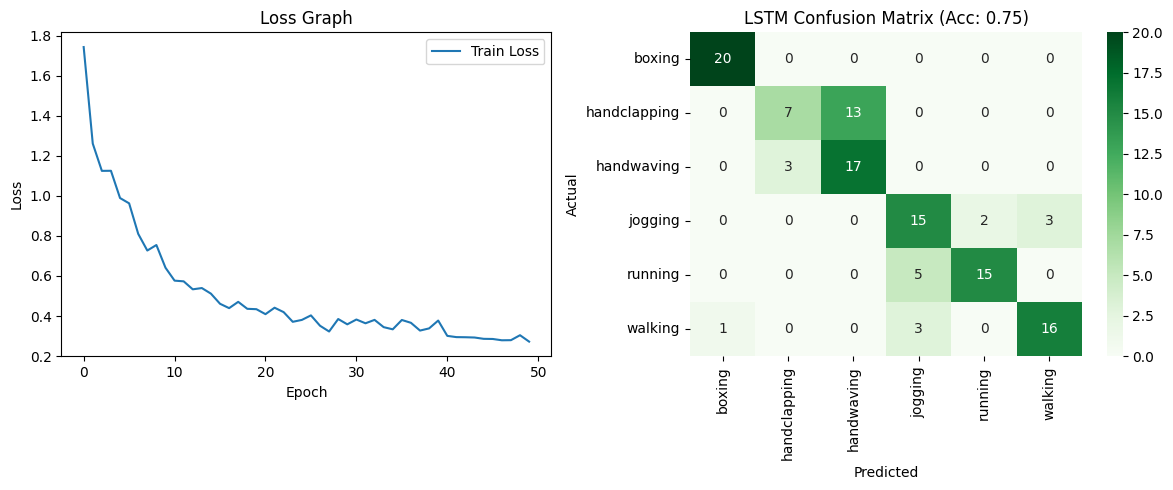

In [ ]:
# LSTM Model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initial Hyperparameters
INPUT_SIZE = 75
HIDDEN_SIZE = 128
NUM_LAYERS = 2
NUM_CLASSES = 6
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001

print(f"Running on: {DEVICE}")

def run_lstm_model():
    print("="*60)
    print("MODEL 3: LSTM")
    print("="*60)

    # Prepare DataLoader for PyTorch
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                  torch.tensor(y_train, dtype=torch.long))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                 torch.tensor(y_test, dtype=torch.long))

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print(f"Input Shape: {X_train.shape}")

    # LSTM Model Definition
    class LSTMClassifier(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, num_classes):
            super(LSTMClassifier, self).__init__()
            self.hidden_size = hidden_size
            self.num_layers = num_layers

            # LSTM Layer
            if num_layers == 1:
                self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                                    batch_first=True)
            else:
                self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                                batch_first=True, dropout=0.2)

            # Fully Connected Layer
            self.fc = nn.Linear(hidden_size, num_classes)

        def forward(self, x):

            # Initial hidden state ve cell state
            h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE)
            c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE)

            # LSTM Forward
            out, _ = self.lstm(x, (h0, c0))

            # Output from the last time step to fully connected layer
            out = out[:, -1, :]

            # Final output
            out = self.fc(out)
            return out

    model = LSTMClassifier(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES).to(DEVICE)

    # Loss and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # Training
    print(f"\nLSTM Training ({EPOCHS} Epoch)...")
    train_losses = []

    model.train()
    for epoch in range(EPOCHS):
        epoch_loss = 0
        correct = 0
        total = 0

        # Batch Training
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            # zero grad for each batch
            optimizer.zero_grad()
            outputs = model(inputs)
            # Calculate loss
            loss = criterion(outputs, labels)

            loss.backward()
            # Gradient Clipping to avoid exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            epoch_loss += loss.item() # Accumulate loss
            _, predicted = torch.max(outputs.data, 1) # Get predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item() # Count of correct predictions

        # Epoch statistics
        avg_loss = epoch_loss / len(train_loader)
        acc = 100 * correct / total
        train_losses.append(avg_loss)

        if (epoch+1) % 5 == 0:
            print(f"   Epoch [{epoch+1}/{EPOCHS}] - Loss: {avg_loss:.4f} - Train Acc: {acc:.2f}%")

    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_acc = accuracy_score(all_labels, all_preds)
    print(f"\nTEST ACCURACY: {test_acc*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes, zero_division=0))

    # Visualization
    plt.figure(figsize=(12, 5))

    # Loss Graph
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.title("Loss Graph")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Confusion Matrix
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
    plt.title(f"LSTM Confusion Matrix (Acc: {test_acc:.2f})")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    run_lstm_model()

In [ ]:
# LSTM Hyperparameter Tuning Same Structure as before only with Variable Hyperparameters
def test_lstm_model():
    print("="*60)
    print("LSTM HYPERPARAMETER TUNING")
    print("="*60)

    # Model Definiton With Variable Hyperparameters
    class LSTMClassifier(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, num_classes):
            super(LSTMClassifier, self).__init__()
            if num_layers == 1:
                self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                                    batch_first=True)
            else:
                self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                                    batch_first=True, dropout=0.2)
            self.fc = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(DEVICE)
            c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(DEVICE)
            out, _ = self.lstm(x, (h0, c0))
            out = out[:, -1, :]
            out = self.fc(out)
            return out

    # Train and Evaluate Function
    def train_evaluate_single_config(params):
        # Extract Parameters
        h_size = params['hidden_size']
        n_layers = params['num_layers']
        lr = params.get('learning_rate', LEARNING_RATE) # Default to initial LR if not provided
        batch_s = params['batch_size']
        eps = params['epochs']

        print(f"\nTesting on: Hidden={h_size}, Layers={n_layers}, LR={lr}, Batch={batch_s}, Epochs={eps}")

        # Prepare DataLoader
        train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                      torch.tensor(y_train, dtype=torch.long))
        test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                     torch.tensor(y_test, dtype=torch.long))

        train_loader = DataLoader(train_dataset, batch_size=batch_s, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_s, shuffle=False)

        # Model, Loss, Optimizer
        model = LSTMClassifier(INPUT_SIZE, h_size, n_layers, NUM_CLASSES).to(DEVICE)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train loop
        model.train()
        for epoch in range(eps):
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                # Gradient Clipping to avoid exploding gradients
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()

        # Evaluation
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs = inputs.to(DEVICE)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        print(f" --> Accuracy: {acc*100:.2f}%")
        return acc, params

    #  Manuel Random Search for Hyperparameter Tuning
    param_grid = {
        'hidden_size': [64, 128, 256],
        'num_layers': [1, 2, 3],
        'learning_rate': [0.001, 0.0005],
        'batch_size': [32,64,128],
        'epochs': [50,75,100]
    }

    best_acc = 0.0
    best_params = {}
    n_iter = 10

    for i in range(n_iter):
        # Random selection of parameters
        current_params = {
            'hidden_size': random.choice(param_grid['hidden_size']),
            'num_layers': random.choice(param_grid['num_layers']),
            'learning_rate': random.choice(param_grid['learning_rate']),
            'batch_size': random.choice(param_grid['batch_size']),
            'epochs': random.choice(param_grid['epochs'])

        }

        acc, params = train_evaluate_single_config(current_params)

        if acc > best_acc:
            best_acc = acc
            best_params = params

    print("="*60)
    print(f"Search Complete.")
    print(f"Best Accuracy: {best_acc*100:.2f}%")
    print(f"Best Parameters: {best_params}")
    print("="*60)
if __name__ == "__main__":
    test_lstm_model()

LSTM HYPERPARAMETER TUNING

Testing on: Hidden=64, Layers=1, LR=0.001, Batch=32, Epochs=75
 --> Accuracy: 74.17%

Testing on: Hidden=256, Layers=1, LR=0.0005, Batch=32, Epochs=75
 --> Accuracy: 70.83%

Testing on: Hidden=64, Layers=3, LR=0.001, Batch=128, Epochs=50
 --> Accuracy: 73.33%

Testing on: Hidden=128, Layers=2, LR=0.001, Batch=32, Epochs=100
 --> Accuracy: 72.50%

Testing on: Hidden=256, Layers=3, LR=0.001, Batch=32, Epochs=50
 --> Accuracy: 66.67%

Testing on: Hidden=256, Layers=1, LR=0.001, Batch=128, Epochs=75
 --> Accuracy: 82.50%

Testing on: Hidden=64, Layers=3, LR=0.001, Batch=32, Epochs=100
 --> Accuracy: 69.17%

Testing on: Hidden=256, Layers=3, LR=0.001, Batch=128, Epochs=100
 --> Accuracy: 69.17%

Testing on: Hidden=128, Layers=3, LR=0.001, Batch=64, Epochs=50
 --> Accuracy: 65.83%

Testing on: Hidden=64, Layers=2, LR=0.0005, Batch=128, Epochs=50
 --> Accuracy: 70.83%
Search Complete.
Best Accuracy: 82.50%
Best Parameters: {'hidden_size': 256, 'num_layers': 1, 'lea

MODEL 3: LSTM
Input Shape: (479, 50, 75)

LSTM Training (75 Epoch)...
   Epoch [5/75] - Loss: 1.4897 - Train Acc: 37.58%
   Epoch [10/75] - Loss: 1.3107 - Train Acc: 47.18%
   Epoch [15/75] - Loss: 1.0215 - Train Acc: 51.57%
   Epoch [20/75] - Loss: 0.7452 - Train Acc: 65.97%
   Epoch [25/75] - Loss: 0.7706 - Train Acc: 69.52%
   Epoch [30/75] - Loss: 0.6279 - Train Acc: 69.52%
   Epoch [35/75] - Loss: 0.5018 - Train Acc: 72.65%
   Epoch [40/75] - Loss: 0.4215 - Train Acc: 81.21%
   Epoch [45/75] - Loss: 0.3777 - Train Acc: 79.75%
   Epoch [50/75] - Loss: 0.4029 - Train Acc: 77.24%
   Epoch [55/75] - Loss: 0.4326 - Train Acc: 79.33%
   Epoch [60/75] - Loss: 0.3444 - Train Acc: 81.63%
   Epoch [65/75] - Loss: 0.3584 - Train Acc: 80.58%
   Epoch [70/75] - Loss: 0.3152 - Train Acc: 84.55%
   Epoch [75/75] - Loss: 0.3142 - Train Acc: 82.25%

TEST ACCURACY: 82.50%

Classification Report:
              precision    recall  f1-score   support

      boxing       0.95      1.00      0.98      

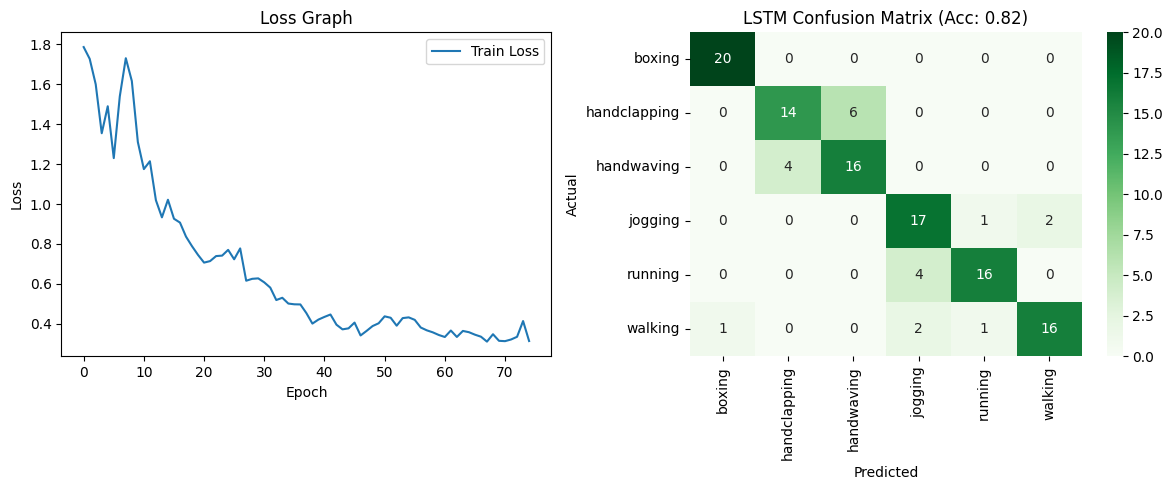

In [ ]:
# Final LSTM Run with Best Hyperparameters
BATCH_SIZE = 128
HIDDEN_SIZE = 256
EPOCHS = 75
NUM_LAYERS = 1
LEARNING_RATE = 0.001
if __name__ == "__main__":
    run_lstm_model()

MODEL 3: LSTM
Input Shape: (479, 50, 75)

LSTM Training (100 Epoch)...
   Epoch [5/100] - Loss: 1.2760 - Train Acc: 44.05%
   Epoch [10/100] - Loss: 0.9758 - Train Acc: 63.67%
   Epoch [15/100] - Loss: 0.7345 - Train Acc: 62.84%
   Epoch [20/100] - Loss: 0.6251 - Train Acc: 69.73%
   Epoch [25/100] - Loss: 0.5857 - Train Acc: 73.49%
   Epoch [30/100] - Loss: 0.4379 - Train Acc: 77.87%
   Epoch [35/100] - Loss: 0.4354 - Train Acc: 77.66%
   Epoch [40/100] - Loss: 0.4154 - Train Acc: 78.50%
   Epoch [45/100] - Loss: 0.5673 - Train Acc: 77.66%
   Epoch [50/100] - Loss: 0.3658 - Train Acc: 82.25%
   Epoch [55/100] - Loss: 0.3833 - Train Acc: 79.96%
   Epoch [60/100] - Loss: 0.3474 - Train Acc: 82.25%
   Epoch [65/100] - Loss: 0.3345 - Train Acc: 81.63%
   Epoch [70/100] - Loss: 0.3037 - Train Acc: 81.84%
   Epoch [75/100] - Loss: 0.2874 - Train Acc: 82.05%
   Epoch [80/100] - Loss: 0.3282 - Train Acc: 81.42%
   Epoch [85/100] - Loss: 0.3199 - Train Acc: 80.17%
   Epoch [90/100] - Loss: 0.3

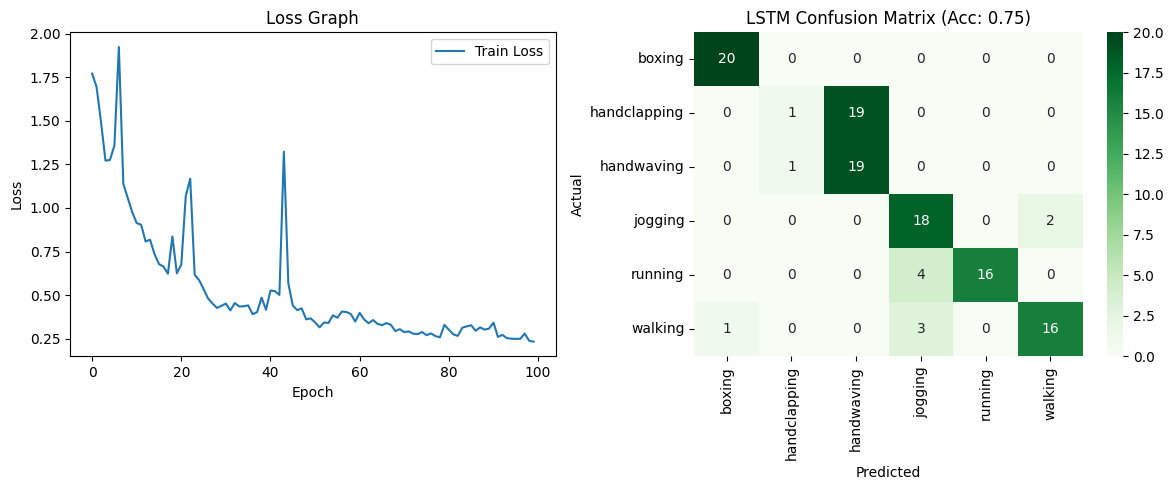

In [ ]:
# Testing with different parameters
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 0.0005
if __name__ == "__main__":
    run_lstm_model()

In [ ]:
# BILSTM MODELİ
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# HİPERPARAMETRELER
INPUT_SIZE = 75
HIDDEN_SIZE = 128
NUM_LAYERS = 2
NUM_CLASSES = 6
BATCH_SIZE = 32
EPOCHS = 60         # Bi-LSTM biraz daha geç öğrenebilir, 60 yaptık
LEARNING_RATE = 0.001

print(f"⚙️ Çalışma Ortamı: {DEVICE}")

def run_bilstm_model():
    print("="*60)
    print("🚀 MODEL 4 (SUGGESTED): BI-DIRECTIONAL LSTM BAŞLATILIYOR")
    print("="*60)

    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                  torch.tensor(y_train, dtype=torch.long))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                 torch.tensor(y_test, dtype=torch.long))

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # 2. Bi-LSTM Mimarisi
    class BiLSTMClassifier(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, num_classes):
            super(BiLSTMClassifier, self).__init__()
            self.hidden_size = hidden_size
            self.num_layers = num_layers

            # bidirectional=True parametresi ekledik!
            self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                                batch_first=True,
                                dropout=0.3,
                                bidirectional=True) # <-- SİHİR BURADA

            # Çift yönlü olduğu için çıktı boyutu hidden_size * 2 olur
            self.fc = nn.Linear(hidden_size * 2, num_classes)

        def forward(self, x):
            # x: (batch, time, input)

            # Initial states (bidirectional olduğu için num_layers * 2)
            h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(DEVICE)
            c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(DEVICE)

            out, _ = self.lstm(x, (h0, c0))

            # (Batch, Time, Hidden*2) -> Son zaman adımını al
            out = out[:, -1, :]

            out = self.fc(out)
            return out

    model = BiLSTMClassifier(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES).to(DEVICE)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # 3. Eğitim
    print(f"\n🧠 Bi-LSTM Eğitiliyor ({EPOCHS} Epoch)...")
    train_losses = []

    model.train()
    for epoch in range(EPOCHS):
        epoch_loss = 0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            # Gradient Clipping to avoid exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = epoch_loss / len(train_loader)
        acc = 100 * correct / total
        train_losses.append(avg_loss)

        if (epoch+1) % 5 == 0:
            print(f"   Epoch [{epoch+1}/{EPOCHS}] - Loss: {avg_loss:.4f} - Train Acc: {acc:.2f}%")

    # 4. Test
    print("\n🔍 Test Seti Değerlendiriliyor...")
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_acc = accuracy_score(all_labels, all_preds)
    print(f"\n🏆 BI-LSTM TEST ACCURACY: {test_acc*100:.2f}%")
    print("\n📄 Detaylı Rapor:")
    print(classification_report(all_labels, all_preds, target_names=classes))

    # 5. Görselleştirme
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', color='purple')
    plt.title("Bi-LSTM Eğitim Kaybı")
    plt.legend()

    plt.subplot(1, 2, 2)
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=classes, yticklabels=classes)
    plt.title(f"Bi-LSTM Confusion Matrix (Acc: {test_acc:.2f})")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_bilstm_model()